In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = '/content/sample_data/'
test_file = 'california_housing_test.csv'
train_file = 'california_housing_train.csv'

In [ ]:
train_df = pd.read_csv(data_dir + train_file)
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
test_df = pd.read_csv(data_dir + test_file)
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
def prepare_dataset(df, normalize):
    if normalize:
        df = (df - df.mean()) / df.std()
    return df.iloc[:,:-1], df.iloc[:,-1]

def plot_model(y_pred, y_test):
    display = pd.DataFrame({"Predicted": y_pred[:100], "Actual": y_test[:100]})
    plt.rcParams["figure.figsize"] = (20,4)
    plt.plot(display)
    plt.legend(display.columns)
    plt.show()

def score_model(model, x_test, y_test, normalized):
    print("Normalized" if normalized else "Unnormalized")
    print(f"R*2 Score: {model.score(x_test, y_test)}")
    y_pred = model.predict(x_test)
    print(f"MS error: {mean_squared_error(y_test, y_pred)}")
    plot_model(y_pred, y_test)

In [ ]:
x_train_norm, y_train_norm = prepare_dataset(train_df, True)
x_train, y_train = prepare_dataset(train_df, False)
x_test_norm, y_test_norm = prepare_dataset(test_df, True)
x_test, y_test = prepare_dataset(test_df, False)

Unnormalized
R*2 Score: 0.6194826484290443
MS error: 0.38039051245377853


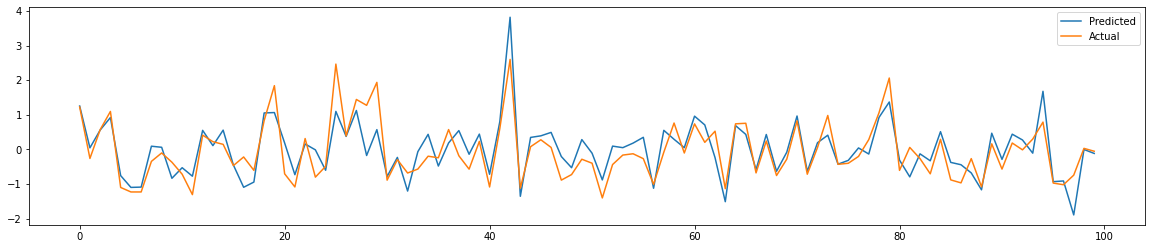

Normalized
R*2 Score: 0.6192893066909194
MS error: 0.3805837897446574


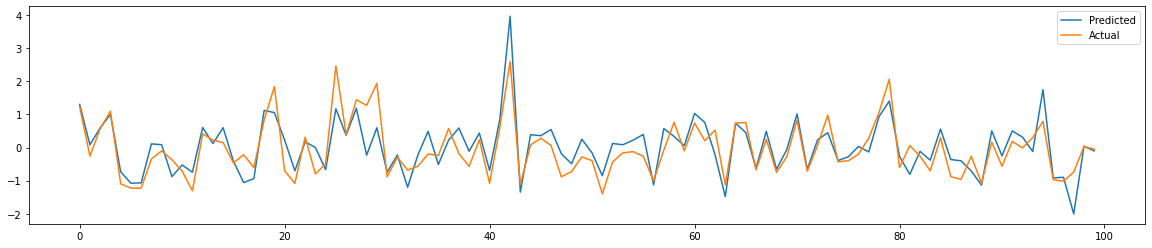

In [ ]:
lr = LinearRegression()
lr = lr.fit(x_train, y_train_norm)
lr_norm = LinearRegression()
lr_norm = lr_norm.fit(x_train_norm, y_train_norm)

score_model(lr, x_test, y_test_norm, False)
score_model(lr_norm, x_test_norm, y_test_norm, True)

Unnormalized
R*2 Score: 0.16097122998864588
MS error: 0.8387490937547127


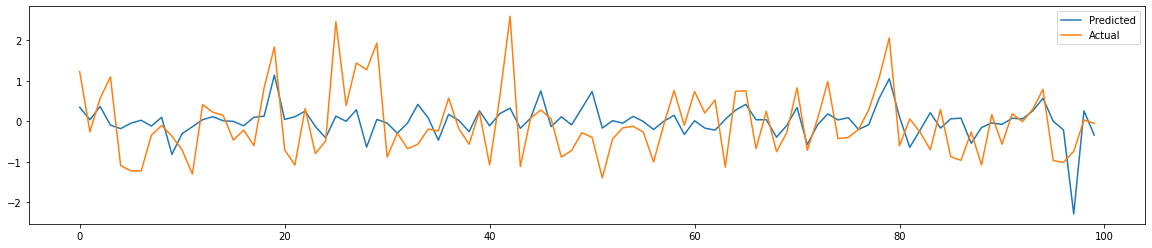

Normalized
R*2 Score: 0.0
MS error: 0.9996666666667012


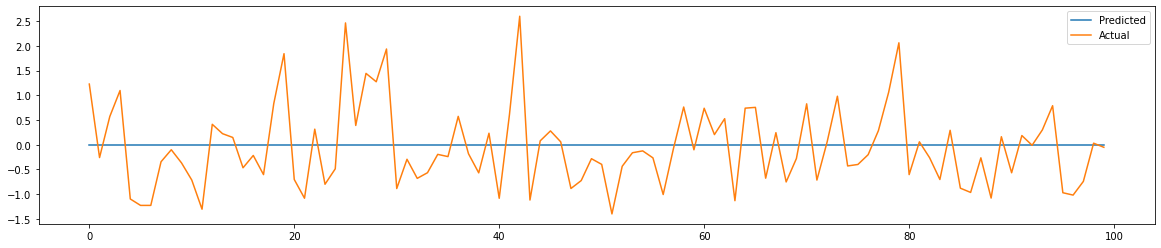

[3.67810357e-17 3.67810357e-17 3.67810357e-17 ... 3.67810357e-17
 3.67810357e-17 3.67810357e-17]


In [ ]:
lasso = Lasso()
lasso = lasso.fit(x_train, y_train_norm)
lasso_norm = Lasso()
lasso_norm = lasso_norm.fit(x_train_norm, y_train_norm)

score_model(lasso, x_test, y_test_norm, False)
score_model(lasso_norm, x_test_norm, y_test_norm, True)

Unnormalized
R*2 Score: 0.26240452387546465
MS error: 0.7373496109658526


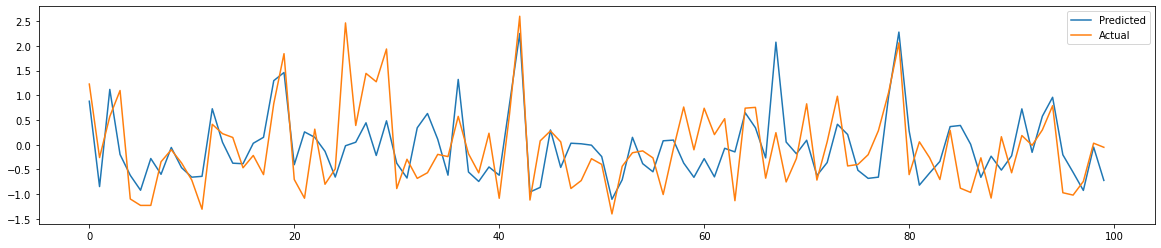

Normalized
R*2 Score: 0.6901855710528864
MS error: 0.3097111574708086


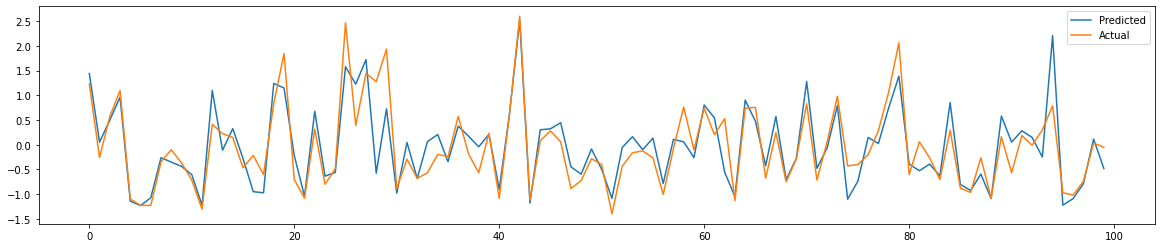

In [ ]:
knnr = KNeighborsRegressor()
knnr = knnr.fit(x_train, y_train_norm)
knnr_norm = KNeighborsRegressor()
knnr_norm = knnr_norm.fit(x_train_norm, y_train_norm)

score_model(knnr, x_test, y_test_norm, False)
score_model(knnr_norm, x_test_norm, y_test_norm, True)

Unnormalized
R*2 Score: 0.6592194383394914
MS error: 0.340666968139967


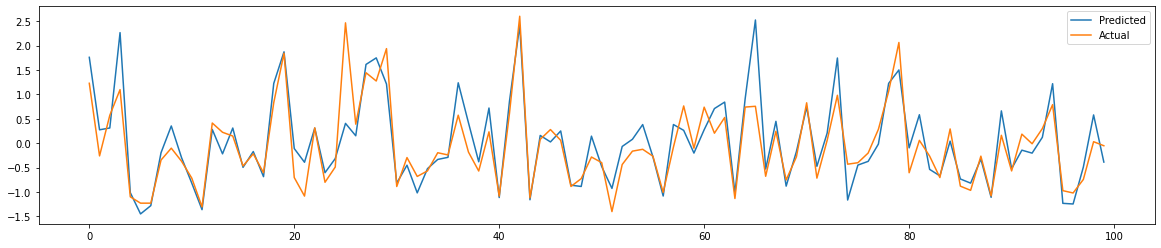

Normalized
R*2 Score: 0.5948913429046397
MS error: 0.4049736208763425


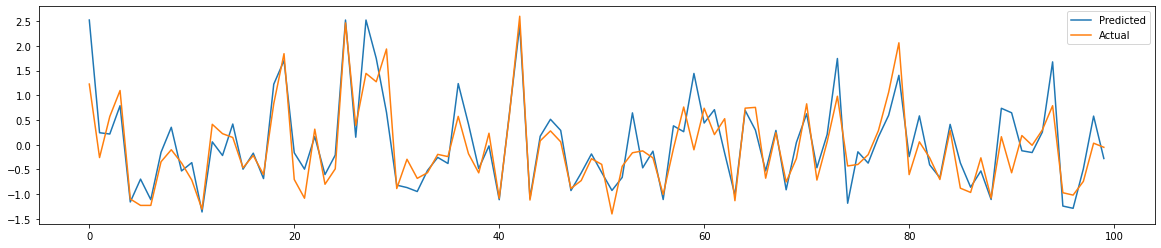

In [ ]:
dtr = DecisionTreeRegressor()
dtr = dtr.fit(x_train, y_train_norm)
dtr_norm = DecisionTreeRegressor()
dtr_norm = dtr_norm.fit(x_train_norm, y_train_norm)

score_model(dtr, x_test, y_test_norm, False)
score_model(dtr_norm, x_test_norm, y_test_norm, True)

Unnormalized
R*2 Score: 0.8082350139088621
MS error: 0.1917010644291142


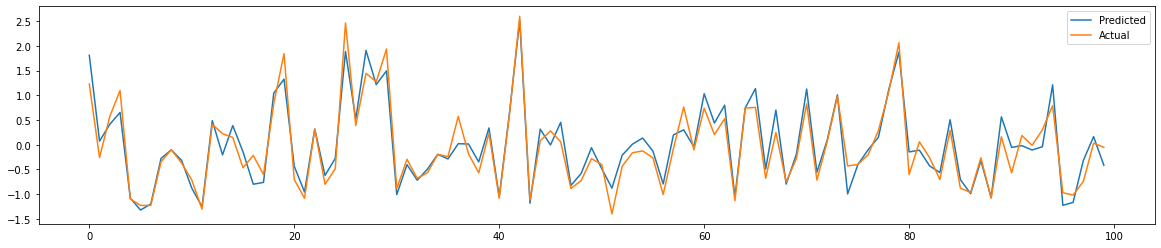

Normalized
R*2 Score: 0.7748829375959687
MS error: 0.22504202338323773


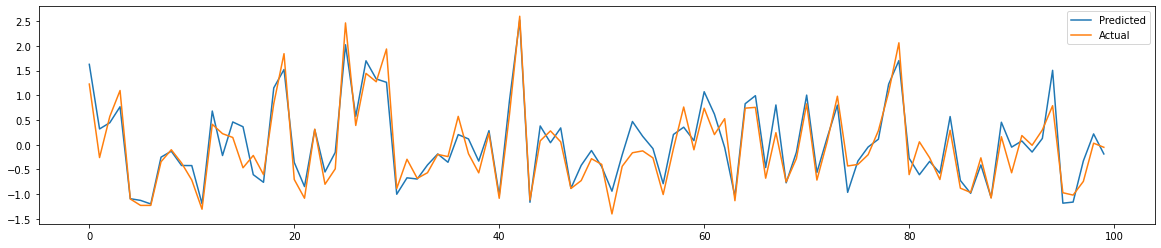

In [ ]:
rfr = RandomForestRegressor()
rfr = rfr.fit(x_train, y_train_norm)
rfr_norm = RandomForestRegressor()
rfr_norm = rfr_norm.fit(x_train_norm, y_train_norm)

score_model(rfr, x_test, y_test_norm, False)
score_model(rfr_norm, x_test_norm, y_test_norm, True)

Unnormalized
R*2 Score: 0.5037005798953507
MS error: 0.4961339869646317


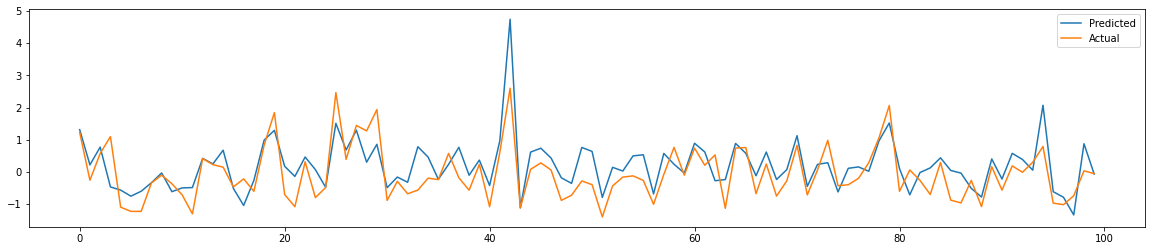

Normalized
R*2 Score: 0.6897265357968372
MS error: 0.3101700397151058


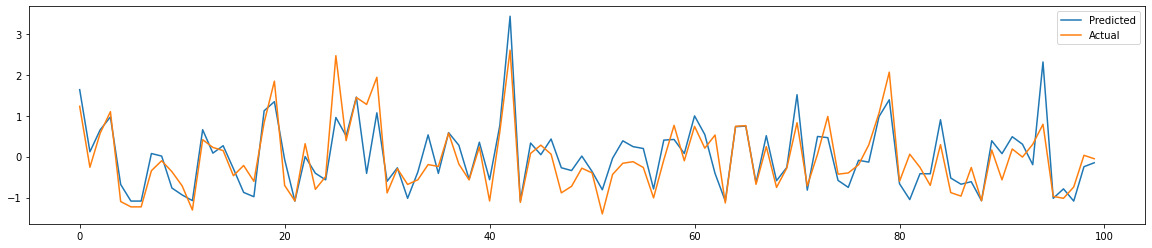

In [ ]:
mlpr = MLPRegressor(hidden_layer_sizes=(6,))
mlpr = mlpr.fit(x_train, y_train_norm)
mlpr_norm = MLPRegressor(hidden_layer_sizes=(6,))
mlpr_norm = mlpr_norm.fit(x_train_norm, y_train_norm)

score_model(mlpr, x_test, y_test_norm, False)
score_model(mlpr_norm, x_test_norm, y_test_norm, True)

Unnormalized
R*2 Score: 0.0007231765235342635
MS error: 0.9989437312020082


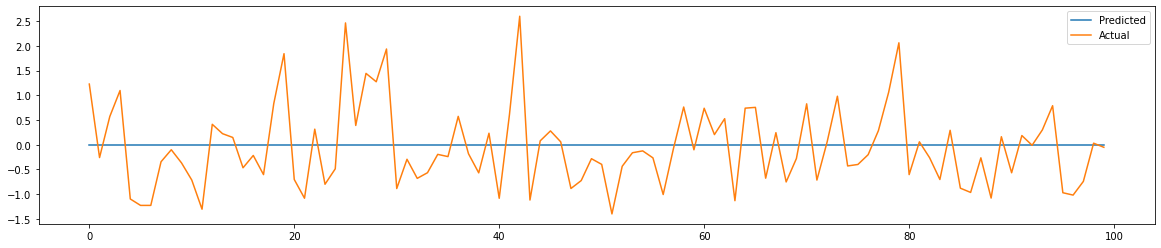

Normalized
R*2 Score: 0.7111809143013761
MS error: 0.28872281267006766


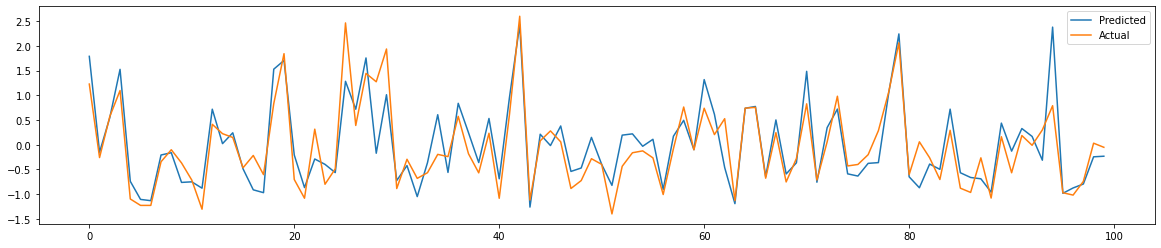

In [ ]:
mlpr = MLPRegressor(hidden_layer_sizes=(6,3))
mlpr = mlpr.fit(x_train, y_train_norm)
mlpr_norm = MLPRegressor(hidden_layer_sizes=(6,3))
mlpr_norm = mlpr_norm.fit(x_train_norm, y_train_norm)

score_model(mlpr, x_test, y_test_norm, False)
score_model(mlpr_norm, x_test_norm, y_test_norm, True)